In [29]:
import sys
import glob
import numpy as np
import pandas as pd
import xarray as xr 
from scipy import interpolate
import matplotlib.pyplot as plt 

sys.path.append('../../src/thermal/')

from open import dataset as open_dataset
import plotting as plotting
from plotting import enthalpy_pcolormesh


plt.rcParams['text.usetex']    = True

In [30]:
S_period = 5.   #[a]
Q_period = 45.  #[a]

# period of full surge cycle
C_period = S_period + Q_period


time = np.arange(0, 100, 0.1)



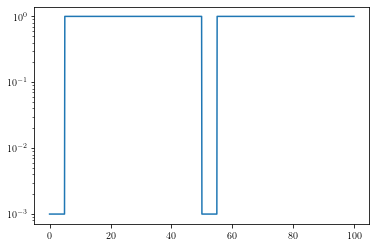

In [31]:
plt.plot(time, np.where(time % C_period < S_period, 1e-3, 1))

plt.yscale('log')

In [32]:
surge_fp = "result/crmpt12/gridded/crmpt12_dx_50_NT_100_dt_0.05_MB_-0.41_OFF_Tma_-8.5_B_0.00025_pseudo.nc"
recov_fp = surge_fp.split('.nc')[0] + '_dt_1.0_NT_2000_recovery.nc'


In [33]:
surge_fp

'result/crmpt12/gridded/crmpt12_dx_50_NT_100_dt_0.05_MB_-0.41_OFF_Tma_-8.5_B_0.00025_pseudo.nc'

In [34]:
xarrays = []
for fp in [surge_fp, recov_fp]: 
    with xr.open_dataset(fp) as src: 
        xarrays.append(src)
        # im = enthalpy_pcolormesh(src, -1, W_max=1.0, axes=ax)

src = xr.concat(xarrays, 't')

FileNotFoundError: [Errno 2] No such file or directory: b'/Users/andrewnolan/Thesis/thermal-structure/study/coupled_surge/result/crmpt12/gridded/crmpt12_dx_50_NT_100_dt_0.05_MB_-0.41_OFF_Tma_-8.5_B_0.00025_pseudo.nc'

In [11]:
calc_volprime = lambda x: x.integrate('X') / x.isel(t=0).integrate('X')

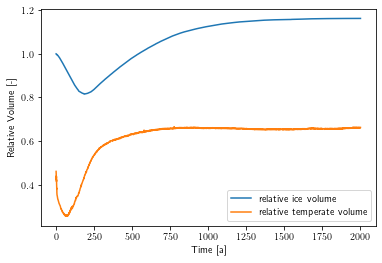

In [17]:
fig, ax = plt.subplots()


ax.plot(np.concatenate((np.arange(0.05, 5.05, 0.05), 
                        np.arange(5.05, 2005))), 
        calc_volprime(src.height.isel(coord_2=-1)), 
        label="relative ice volume")

# ax2 = ax.twinx()
ax.plot(np.concatenate((np.arange(0.05, 5.05, 0.05), 
                        np.arange(5.05, 2005))), 
         src.percent_temperate / 100, 
        label="relative temperate volume")


ax.set_ylabel('Relative Volume [-]')
ax.set_xlabel('Time [a]')

ax.legend()
fig.savefig('figs/crmpt12/full_percent.png', dpi=300, 
            bbox_inches='tight', facecolor='w')

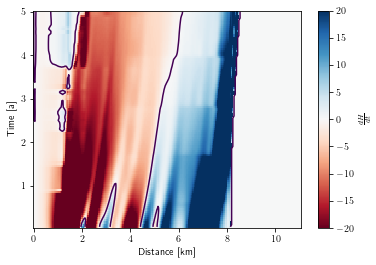

In [18]:
fig, ax = plt.subplots()

im = ax.pcolormesh(src.X.isel(coord_2=-1)[::-1]/1e3, 
                   src.t.isel(t=slice(0,100)), 
                   src.height.isel(t=slice(0,100), coord_2=-1).differentiate('t'), 
                   cmap='RdBu', 
                   vmin=-20, vmax=20)

ax.contour(src.X.isel(coord_2=-1)[::-1]/1e3, 
              src.t.isel(t=slice(0,100)), 
              src.height.isel(t=slice(0,100), coord_2=-1).differentiate('t'), 
              levels=[0.0])


ax.set_ylabel('Time [a]')
ax.set_xlabel('Distance [km]')
fig.colorbar(im, label='$\\frac{d H}{d t}$')

fig.savefig('figs/crmpt12/dHdt_surge.png', bbox_inches='tight', 
            facecolor='w', dpi=300)

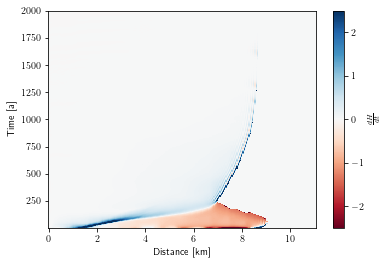

In [20]:
fig, ax = plt.subplots()

im = ax.pcolormesh(src.X.isel(coord_2=-1)[::-1]/1e3, 
                   src.t.isel(t=slice(101,None)), 
                   src.height.isel(t=slice(101,None), coord_2=-1).differentiate('t'), 
                   cmap='RdBu', 
                   vmin=-2.5, vmax=2.5)


ax.set_ylabel('Time [a]')
ax.set_xlabel('Distance [km]')
fig.colorbar(im, label='$\\frac{d H}{d t}$')

fig.savefig('figs/crmpt12/dHdt_recovery.png', bbox_inches='tight', 
            facecolor='w', dpi=300)

In [30]:
ani = plotting.animate_enthalpy(src, i_0=0, i_s=20, i_f=1201, interval=200); 

# ax.set_xlabel('Distance [km]')
# ax.set_ylabel('Elevation [m a.s.l.]')

# cb.set_label('Water Content [\%] / Homologous Temperature [$^\circ$C]',
#                rotation=270, labelpad=10)
plt.close()

In [31]:
ani

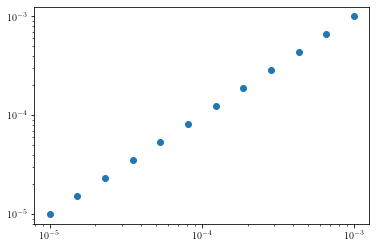

In [217]:
plt.scatter(np.logspace(-5, -3, 12), np.logspace(-5, -3, 12))
# plt.scatter( np.linspace(1e-3, 1e-5, 12), np.linspace(1e-3, 1e-5, 12))
plt.yscale('log')
plt.xscale('log')

In [24]:
src

NameError: name 'src' is not defined

In [221]:
10 / 0.01

1000.0

In [97]:
ani.save('figs/crmpt12/full.mp4', 
         dpi=400)

In [ ]:
fig, ax = plt.subplots(figsize=(6,3), constrained_layout=True)

im = ax.pcolormesh(src_ds.X[:,::-1]/1e3,
                   src_ds.Z.isel(t=-1), 
                   src_ds.temperature.isel(t=-1), 
                   shading='gouraud')

ax.plot(src_ds.X.isel(coord_2=-1)[::-1]/1e3, 
        src_ds.Z.isel(coord_2=-1, t=0),
        color='k', alpha=0.5, lw=1.0)

cbar = fig.colorbar(im)
cbar.set_label('Homologous Temperature [$^\circ$ C]', 
               rotation=270, labelpad=15)

ax.set_ylabel('Elevation [m a.s.l.]')
ax.set_xlabel('Distance from headwall [km]')

fig.savefig('/Users/andrewnolan/Desktop/abstract_draft.jpeg', 
            bbox_inches='tight', facecolor='w', dpi=600)

In [ ]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(src_ds.X.isel(coord_2=-1), 
                   src_ds.t,
                   src_ds.height.isel(coord_2=-1).differentiate('t'),
                   shading='gouraud',
                   clim=(-15,15), vmin=-15, vmax=15, cmap='RdBu')

mask = (src_ds.enthalpy_h <= src_ds['phase change enthalpy']).isel(coord_2=0)

ax.pcolor(src_ds.X.isel(coord_2=-1), 
          src_ds.t, 
          src_ds.enthalpy_h.isel(coord_2=-1).where(mask), 
          alpha=0.0,
          hatch='///', 
          
          zorder=2)

plt.colorbar(im, extend='both')

plt.savefig('dHdt.pdf', bbox_inches='tight', facecolor='w')

In [ ]:
mask = (src_ds.enthalpy_h >= src_ds['phase change enthalpy']).isel(coord_2=0)

XX, TT = np.meshgrid(mask.X, mask.t)

In [ ]:
src_ds.enthalpy_h.isel(coord_2=-1).where(mask)

In [ ]:
def detrend_dim(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

def detrend(da, dims, deg=1):
    # detrend along multiple dimensions
    # only valid for linear detrending (deg=1)
    da_detrended = da
    for dim in dims:
        da_detrended = detrend_dim(da_detrended, dim, deg=deg)
    return da_detrended

In [ ]:
detrend(src_ds.surface_enthalpy.isel(coord_2=-1), ['coord_1']).plot()

In [ ]:
src_ds.surface_enthalpy.dims